<a href="https://colab.research.google.com/github/kacpercierpiak/AED_LAB/blob/main/AED_L_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **ALGORYTMY I EKSPLORACJA DANYCH**
# *LAB2 - Redukcja wymiarowości*


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image
from sklearn.datasets import load_breast_cancer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

cancer = load_breast_cancer()
df = pd.DataFrame(np.c_[cancer['data'], cancer['target']],
                  columns= np.append(cancer['feature_names'], ['target']))

### **Zadanie 1**
Wczytaj zbiór danych pochodzący z biblioteki sklearn

In [83]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0.0


1. Wymiar wczytanych danych

In [84]:
print(f"Data shape: {df.shape}")

Data shape: (569, 31)


2. Ilość wartości unikatowych w wektorze target

In [85]:
print(f"Target unique val qty: {len(df['target'].unique())}")

Target unique val qty: 2


3. Zaproponuj usunięcie tych kolumn ze zbioru danych, które Twoim zdaniem
dostarczają najmniej informacji.

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [87]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


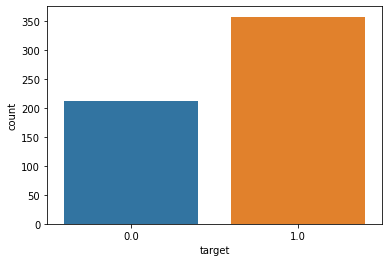

In [88]:
sns.countplot(df['target'])

In [89]:
#apply SelectKBest class to extract top 10 best features
X = df.iloc[:, df.columns != "target"]
y = df.iloc[:, df.columns == "target"]

bestfeatures = SelectKBest(score_func=chi2, k=5)
fit = bestfeatures.fit(X,y)
#concat two dataframes for better visualization 
featureScores = pd.Series(fit.scores_, index=X.columns)
print(featureScores.nsmallest(31))  #print 10 best features

mean fractal dimension          0.000074
symmetry error                  0.000080
smoothness error                0.003266
fractal dimension error         0.006371
texture error                   0.009794
mean smoothness                 0.149899
worst fractal dimension         0.231522
mean symmetry                   0.257380
concave points error            0.305232
worst smoothness                0.397366
compactness error               0.613785
concavity error                 1.044718
worst symmetry                  1.298861
mean compactness                5.403075
mean concave points            10.544035
worst concave points           13.485419
worst compactness              19.314922
mean concavity                 19.712354
radius error                   34.675247
worst concavity                39.516915
mean texture                   93.897508
worst texture                 174.449400
perimeter error               250.571896
mean radius                   266.104917
worst radius    

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.04514419 0.01975423 0.05564202 0.06785545 0.01117379 0.03206675
 0.03896096 0.10093979 0.00925411 0.00528155 0.01966236 0.004876
 0.01840859 0.03117745 0.00524427 0.00807225 0.00952291 0.01121885
 0.00557997 0.00582412 0.08441932 0.02719875 0.11286738 0.07091938
 0.01891475 0.02537516 0.0370482  0.09040265 0.01370976 0.01348502]
texture error              0.004876
smoothness error           0.005244
mean fractal dimension     0.005282
symmetry error             0.005580
fractal dimension error    0.005824
compactness error          0.008072
mean symmetry              0.009254
concavity error            0.009523
mean smoothness            0.011174
concave points error       0.011219
worst fractal dimension    0.013485
worst symmetry             0.013710
perimeter error            0.018409
worst smoothness           0.018915
radius error               0.019662
mean texture               0.019754
worst compactness          0.025375
worst texture              0.027199
area error        

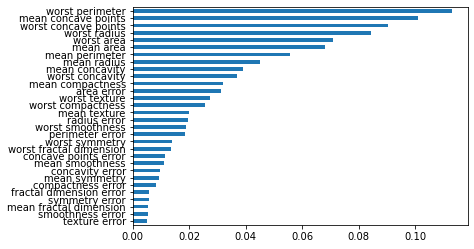

In [90]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nsmallest(31).plot(kind='barh')
print(feat_importances.nsmallest(31))
plt.show()

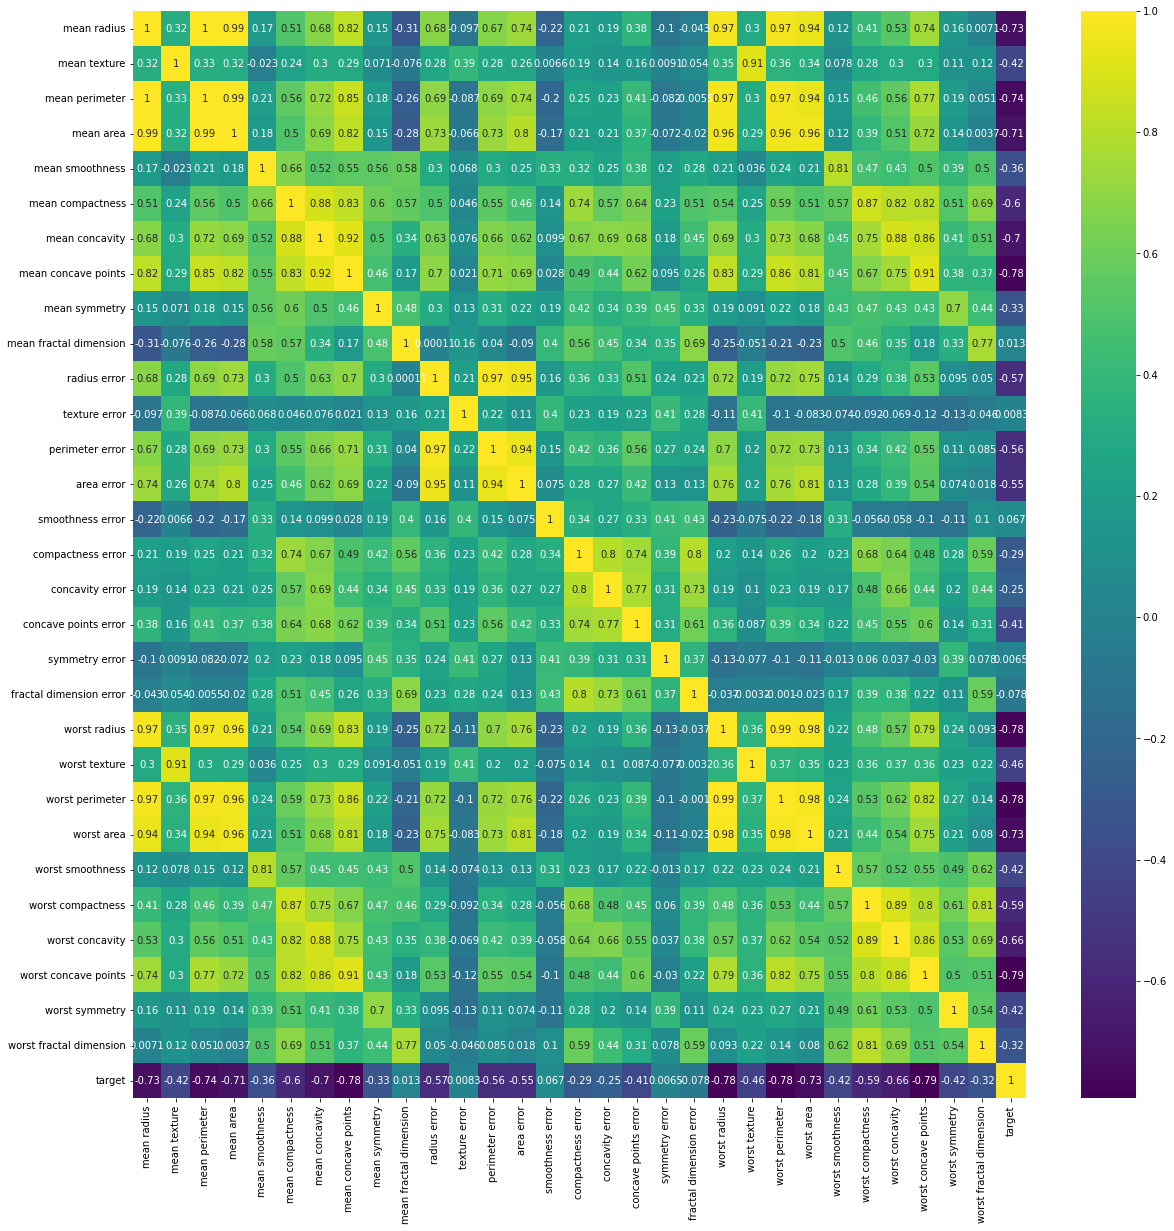

In [91]:
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="viridis")
correlation = df[top_corr_features].corr()["target"].abs()
correlation = correlation.drop("target")

4. Zapisz w pliku dataset_cut.csv wypadkowy zbiór danych jak poniżej:
ColName1; ColName2; ...; TARGET

In [92]:
val = np.sqrt(featureScores)
featureScores_r = (val - val.min()) / (val.max() - val.min())
feat_importances_r = (feat_importances - feat_importances.min() ) / (feat_importances.max() - feat_importances.min())
dfr = (featureScores_r * feat_importances_r * correlation)
filtered = dfr[dfr>0.01]

result = np.append(filtered.index.values,'target')
df[result].to_csv("dataset_cut.csv",";")
print(result)


['mean radius' 'mean perimeter' 'mean area' 'area error' 'worst radius'
 'worst perimeter' 'worst area' 'target']


5. Skomentuj otrzymane rezultaty.<br/>
Aby określić kolumny które dostarczają najmniej informacji zostały wykorzystany iloczyn znormalizowanych 3 parametrów:
- Feature Score
- Feature Important
- Feature Correlation

Dolny limit został ustawiony na 0.01 (skala 0-1). Poniżej lista kolumn  po usunięciu tych które dostarczają mało informacji
- mean radius 
- mean perimeter 
- mean area 
- area error
- worst radius
- worst perimeter
- worst area
- target

### **Zadanie 2**
Wykonaj redukcję wymiarowości za pomocą algorytmu PCA – analiza głównych
składowych.

In [93]:
from sklearn.decomposition import PCA

1. Wprowadź zbiór danych do algorytmu PCA

In [94]:
normalized_data = preprocessing.StandardScaler().fit_transform(cancer['data'])

2. Wykonaj redukcję wymiarowości do 5 wymiarów wypadkowego zbioru danych

In [95]:
pca = PCA(n_components=5)

In [96]:
pca_data = pca.fit_transform(normalized_data)

3. Zapisz w pliku dataset_pca_5.csv wypadkowy zbiór danych jak poniżej:
COMP1; COMP2; COMP3; COMP4; COMP5; TARGET

In [97]:
result = np.hstack((pca_data, np.atleast_2d(cancer['target']).T))
df = pd.DataFrame(result)
df.to_csv("dataset_pca_5.csv",";",index=False)

4. Oblicz wariancję zbioru danych po redukcji wymiarowości
5. Oblicz wartość wariancji wyjaśnionej dla wygenerowanych składowych (ang.
explained variance ratio)

In [98]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768]


In [99]:
total_var = 100 * np.sum(pca.explained_variance_ratio_)
print(f'{total_var:.3}% of total variance is explained by 5 principal components')

84.7% of total variance is explained by 5 principal components


In [100]:
df.describe()

,0,1,2,3,4,5
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,7.960826e-17,-1.276074e-16,6.165738e-17,5.463312e-17,2.980432e-17,0.627417
std,3.647601e+00,2.387755e+00,1.680152e+00,1.408591e+00,1.285159e+00,0.483918
min,-5.565736e+00,-7.775853e+00,-4.880361e+00,-5.133989e+00,-4.789656e+00,0.000000
25%,-2.757430e+00,-1.499825e+00,-1.017071e+00,-7.863142e-01,-6.160920e-01,0.000000
50%,-1.173831e+00,-1.959558e-01,-1.557018e-01,1.155644e-01,-2.898377e-02,1.000000
75%,2.508766e+00,1.228297e+00,8.568267e-01,9.694187e-01,6.108409e-01,1.000000
max,1.631923e+01,1.257319e+01,1.011242e+01,5.194257e+00,7.490434e+00,1.000000


6. Skomentuj otrzymane rezultaty.<br/>
Przy 5 czynnikach suma składowych wynosi 84,7 % wariancji

### **Zadanie 3** 
Wykonaj redukcję wymiarowości za pomocą algorytmu PCA – analiza głównych
składowych.

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(0.9)

In [71]:
pca_data = pca.fit_transform(normalized_data)

In [72]:
result = np.hstack((pca_data, np.atleast_2d(cancer['target']).T))
df = pd.DataFrame(result)
df.to_csv("dataset_pca_n.csv",";",index=False)

In [73]:
print(pca.explained_variance_ratio_)

[0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]


In [74]:
total_var = 100 * np.sum(pca.explained_variance_ratio_)
print(f'{total_var:.3}% of total variance is explained')

91.0% of total variance is explained


In [75]:
df.describe()

,0,1,2,3,4,5,6,7
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,2.809703e-17,7.804731e-17,6.009643e-17,5.541359e-17,-7.668148e-17,-1.912159e-17,1.170710e-17,0.627417
std,3.647601e+00,2.387755e+00,1.680152e+00,1.408591e+00,1.285159e+00,1.099765e+00,8.224408e-01,0.483918
min,-5.565736e+00,-7.775853e+00,-4.880361e+00,-5.133988e+00,-4.789656e+00,-4.217768e+00,-4.084684e+00,0.000000
25%,-2.757430e+00,-1.499825e+00,-1.017071e+00,-7.863120e-01,-6.160920e-01,-7.280625e-01,-4.478907e-01,0.000000
50%,-1.173831e+00,-1.959558e-01,-1.557020e-01,1.155658e-01,-2.898355e-02,-7.241380e-02,-1.817796e-02,1.000000
75%,2.508766e+00,1.228297e+00,8.568268e-01,9.694156e-01,6.108408e-01,6.169900e-01,4.540371e-01,1.000000
max,1.631923e+01,1.257319e+01,1.011242e+01,5.194270e+00,7.490434e+00,5.134228e+00,5.417219e+00,1.000000


5. Skomentuj otrzymane rezultaty.<br>
Aby suma składowych stanowiła minimum 90% wariancji zbiór danych musi posiadać 7 wymiarów

### **Zadanie 4** 
Wykonaj redukcję wymiarowości na podstawie dowolnego innego algorytmu a wynik zapisz
w pliku dataset_algorithm.csv. Skomentuj otrzymane rezultaty.

In [76]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis as NCA 
nca = NCA(5) 
nca_data = nca.fit_transform(normalized_data, cancer.target)

In [77]:
result = np.hstack((nca_data, np.atleast_2d(cancer['target']).T))
df = pd.DataFrame(result)
df.to_csv("dataset_nca.csv",";",index=False)

In [78]:
df.describe()

,0,1,2,3,4,5
count,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,5.690000e+02,569.000000
mean,-9.215827e-15,-3.521495e-15,4.728887e-15,9.833961e-17,1.267488e-15,0.627417
std,1.799436e+01,7.407070e+00,6.033938e+00,3.906391e+00,8.796602e+00,0.483918
min,-2.996904e+01,-4.674461e+01,-1.347198e+01,-1.723965e+01,-3.722238e+01,0.000000
25%,-1.292175e+01,-4.336042e+00,-3.695106e+00,-2.588240e+00,-5.608986e+00,0.000000
50%,-6.286366e+00,2.092556e+00,-8.269952e-01,5.227653e-01,1.064158e+00,1.000000
75%,1.013642e+01,4.863584e+00,2.846538e+00,2.641546e+00,6.223521e+00,1.000000
max,1.060036e+02,1.800234e+01,4.337190e+01,8.497637e+00,1.847491e+01,1.000000


W przeciwieństwie do algorytmu PCA algorytm NCA wymaga również etykiet